# Assuming only truth b-jets

Some definition to start with:

+ $N^{truth}_{b}\,\equiv\,$ number of truth b-jets in the event.
+ $N^{reco}_{b}\,\equiv\,$ number of b-tagged jets in the events
+ $N_{N^{reco}_{b}} \,\equiv\,$ number of events with $N^{reco}_{b}$ b-tagged jets


We can write the number of events with $N^{reco}_{b}$ b-tagged jets knowing the probability $\mathcal{P}(N^{reco}_{b}|N^{truth}_{b},\epsilon)$ to tag $N^{reco}_{b}$ b-jets among $N^{truth}_{b}$ truth b-jets assuming a b-tagging effiency of $\epsilon$:
$$
N_{N^{reco}_{b}} \, = \, \sum_{Evt} \, \mathcal{P}\,(N^{reco}_{b}|N^{truth}_{b},\epsilon)
$$

where
\begin{eqnarray}
\mathcal{P}\,(N^{reco}_{b}|N^{truth}_{b},\epsilon) &=& \binom{N^{truth}_{b}}{N^{reco}_{b}} \times \epsilon^{N^{reco}_{b}} \times (1-\epsilon)^{N^{truth}_{b}-N^{reco}_{b}}\\ 
                                                   &=& \frac{N^{truth}_{b}!}{N^{reco}_{b}!(N^{truth}_{b}-N^{reco}_{b})!} \, \epsilon^{N^{reco}_{b}} \times (1-\epsilon)^{N^{truth}_{b}-N^{reco}_{b}}\\
\end{eqnarray}

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy.special import comb 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline                                                                                                                                                                           
from rootpy.plotting.style import set_style
set_style('ATLAS', mpl=True)
mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize']  = 24
mpl.rcParams['lines.linewidth'] = 2.5

import jupy_pandoc_utils as jpu

Welcome to JupyROOT 6.10/02


INFO:rootpy.plotting.style] using matplotlib style 'ATLAS'


## Exclusive probabilities

In [2]:
def P(eff,n_reco,n_truth):
    return comb(n_truth,n_reco) * eff**n_reco * (1-eff)**(n_truth-n_reco)

In [3]:
x=np.linspace(0,1,100)
nt=5
for nr in range(0,6):
    plt.plot(x,P(x,nr,nt),label='$(N^{reco}_{b},N^{truth}_{b})='+'({:.0f},{:.0f})$'.format(nr,nt))
plt.xlabel('$\epsilon$')
plt.ylabel('$\mathcal{P}\,(N^{reco}_{b}\,|\,N^{truth}_{b},\epsilon)$')
plt.ylim(0,1.5)
plt.legend()
jpu.plt2md('fig1','Probability to reconstruct $N^{\\text{reco}}_{b}$ for $N^{\\text{truth}}_{b}=5$, '+
          'as function of $b$-tagging efficiency.','70%','fig:exclProba')

![Probability to reconstruct $N^{\text{reco}}_{b}$ for $N^{\text{truth}}_{b}=5$, as function of $b$-tagging efficiency.](fig1__jpu_n0.png){width=70% #fig:exclProba}

In [4]:
Nbtot = 5
NbjetsTruth_arr = range(0,Nbtot+1)
plt.figure(figsize=(19,6))

# Plot probability versus reco Nb
plt.subplot(1,3,1)
for e in np.linspace(0.5,1.0,6):
    plt.plot(NbjetsTruth_arr, [P(e,n,Nbtot) for n in NbjetsTruth_arr],label='$\epsilon={:.1f}$'.format(e))
plt.legend()
plt.xlabel('$N^{reco}_{b}$')
plt.ylabel('$\mathcal{P}\,(N^{reco}_{b}\,|\,'+'{}'.format(Nbtot)+',\epsilon)$')
plt.title('Event with {} truth b-jets'.format(Nbtot))

# Plot the most likely number of b-tagged jet versus the efficiency
plt.subplot(1,3,2)
Nb_maxProba=[]
effs = np.linspace(0.5,1.0,30)
for e in effs:
    index_max = np.argmax( [P(e,n,Nbtot) for n in NbjetsTruth_arr] )
    Nb_maxProba.append(NbjetsTruth_arr[index_max])

plt.plot(effs,Nb_maxProba,'o',label='Exact')
plt.plot(effs,Nbtot*effs,label='$\epsilon \; x \; N^{truth}_{b}$')
plt.legend()
plt.ylabel('$N^{reco}_{b}$ giving $\mathcal{P}_{max}$')
plt.xlabel('$\epsilon$')
plt.title('Event with {} truth b-jets'.format(Nbtot))


# Probability to get the most likely number of b-tagged jet versus the efficiency
plt.subplot(1,3,3)
maxProba=[]
for e in effs:
    maxProba.append( np.max( [P(e,n,Nbtot) for n in NbjetsTruth_arr] ) )

plt.plot(effs,maxProba,'o',label='Exact')
plt.plot(effs,effs**Nb_maxProba,label='$\epsilon^{N^{reco}_{b}} \; x \; N^{truth}_{b}$')
plt.legend()
plt.ylabel('$\mathcal{P}_{max}$')
plt.xlabel('$\epsilon$')
plt.ylim(0,1.2)
plt.title('Event with {} truth b-jets'.format(Nbtot))

plt.tight_layout()
jpu.plt2md('fig2','Probability as fuction of the reconstruced $b$-jets (left), '+
           'number of b-tagged jets with the maximum probability as function of the efficiency (middle) '+
           'maximum probability as function of the efficiency (right)','100%','fig:exclProba2')

![Probability as fuction of the reconstruced $b$-jets (left), number of b-tagged jets with the maximum probability as function of the efficiency (middle) maximum probability as function of the efficiency (right)](fig2__jpu_n0.png){width=100% #fig:exclProba2}

## Inclusive probabilities

In [5]:
def InclusiveP(epsilon,nbmin,nj):
    return np.sum( [P(epsilon,nb,nj) for nb in range(nbmin,nj+1)] )

In [6]:
Nbtot = 5
NbjetsTruth_arr = range(0,Nbtot+1)
effs = np.linspace(0.0,1.0,100)
plt.figure(figsize=(15,6))

# Plot inclusive proba versus efficiency
plt.subplot(1,2,1)
for Nbmin in NbjetsTruth_arr :
    plt.plot(effs,[InclusiveP(e,Nbmin,Nbtot) for e in effs],\
             label='$N^{reco}_{b} \geq '+'{:.0f}$'.format(Nbmin))
plt.ylabel('$\mathcal{P}\,(N^{reco}_{b}\, \geq \, X \, |'+'{}'.format(Nbtot)+',\epsilon)$')
plt.xlabel('$\epsilon$')
plt.title('Event with {} truth b-jets'.format(Nbtot))
plt.xlim(0,1.4)
plt.legend()

# Plot inclusive proba versus Nbreco min
plt.subplot(1,2,2)
for e in np.linspace(0.5,1.0,10):
    plt.plot(NbjetsTruth_arr,[InclusiveP(e,Nbmin,5) for Nbmin in NbjetsTruth_arr], \
             label='$\epsilon={:.1f}$'.format(e))
plt.ylabel('$\mathcal{P}\,(N^{reco}_{b}\, \geq \, X \, |'+'{}'.format(Nbtot)+',\epsilon)$')
plt.xlabel('$X$')
plt.title('Event with {} truth b-jets'.format(Nbtot))
plt.legend()

plt.tight_layout()
jpu.plt2md('fig3','Inclusive probability as function of the efficiency (left) and '+
          'as function of number of jets (right)','100%','fig:InclProbab1')

![Inclusive probability as function of the efficiency (left) and as function of number of jets (right)](fig3__jpu_n0.png){width=100% #fig:InclProbab1}

# Assuming both truth b-jets and light jets

+ $N^{truth}_{b}\,\equiv\,$ number of truth b-jets in the event.
+ $N^{reco}_{b}\,\equiv\,$ number of b-tagged jets in the events
+ $N^{truth}_{j}\,\equiv\,$ number of truth light jets in the event.
+ $N^{reco}_{j}\,\equiv\,$ number of reconstructed light jets in the events

In principle, the interesting probability would be now $\mathcal{P}\,(N^{reco}_{b}, N^{reco}_{j}\,|\,N^{truth}_{b},N^{truth}_{j},\epsilon,f\,)$ where $f$ stands for the mis-tag rate (ie the probability that a light jet is tagged as a b-jet). But since, we assume here a jet reconstruction efficiency of 100% (ie $N^{truth}_{b}+N^{truth}_{j} = N^{reco}_{b}+N^{reco}_{j}$), this reduces to $\mathcal{P}\,(N^{reco}_{b}\,|\,N^{truth}_{b},N^{truth}_{j},\epsilon,f\,)$.


There is an easy way to split the problem since we need to consider all configuration where the sum of tagging and mis-tagging gives the wanted number of b-tagged jets:
$$
\mathcal{P}\,(N^{reco}_{b}\,|\,N^{truth}_{b},N^{truth}_{j}) \; = \; \sum_{k+\ell=N^{reco}_{b}} \: \mathcal{P}(N^{truth}_{b} \to k, \,\epsilon) \, \times \, \mathcal{P}(N^{truth}_{j} \to \ell, \,f) 
$$
where $\mathcal{P}(N^{truth}_{b} \to k)$ is the probability to tag $k$ reco b-jets (from truth b-jets) and $\mathcal{P}(N^{truth}_{j} \to \ell)$ is the probability to mis-tag $\ell$ reco b-jets (from truth light jet). These individual probabilities are easy to write:
$$
\mathcal{P}(N^{truth}_{b} \to k, \, \epsilon) = \binom{N^{truth}_{b}}{k} \times \epsilon^{k} \times (1-\epsilon)^{N^{truth}_{b}-k}\\
\mathcal{P}(N^{truth}_{j} \to \ell, \, f) = \binom{N^{truth}_{j}}{\ell} \times f^{\ell} \times (1-f)^{N^{truth}_{j}-\ell}
$$

In [7]:
def proba_light_to_heavy(nbr,njtruth,f):
    '''
    Return the proba to have nbr mis-tagged jets 
    and njtruth-nbr light jets from njtruh truth light jets
    '''
    if (nbr>njtruth): return 0.0
    return comb(njtruth,nbr) * f**nbr * (1-f)**(njtruth-nbr)

def proba_heavy_to_heavy(nbr,nbtruth,e):
    '''
    Return the proba to have nbr tagged jets and njtruth-nbr 
    not tagged jets from nbtruh truth b-jets
    '''
    if(nbr>nbtruth): return 0.0
    return comb(nbtruth,nbr) * e**nbr * (1-e)**(nbtruth-nbr)

def ProbaFull(nbr,nbt,njt,e,f):
    '''
    Return the probability to have \'nbr\' b-tagged jets in a 
    event with \'nbt\' truth b-jets and \'njt\' truth light jets.
    '''
    kl = [[nbr-i,i] for i in range(0,nbr+1)]
    each_proba = [ 
                    proba_heavy_to_heavy(k,nbt,e)*\
                    proba_light_to_heavy(l,njt,f) 
                    for [k,l] in kl
                 ]
    return np.sum(each_proba)

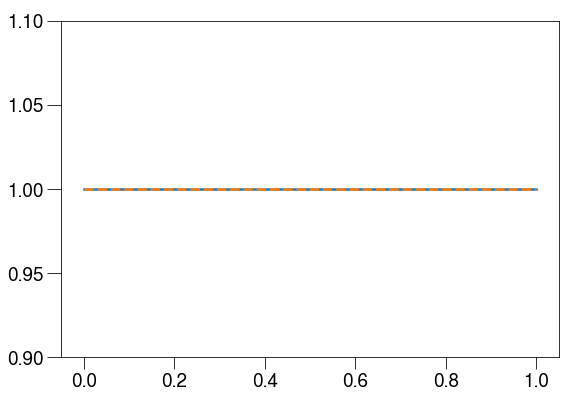

In [8]:
# Sanity check, ie sum of proba=1 whatever fake or epsilon values
njt=5; nbt=5
effs    = np.linspace(0.0,1.0,100)
proba_e = [ np.sum([ProbaFull(nbr,nbt,njt,e,0.2) for nbr in range(0,njt+nbt+1)]) for e in effs]
proba_f = [ np.sum([ProbaFull(nbr,nbt,njt,0.8,f) for nbr in range(0,njt+nbt+1)]) for f in effs]

plt.ylim(0.9,1.1)
plt.plot(effs, proba_e )
plt.plot(effs, proba_f, '--')

## Exclusive probabilities

In [9]:
njt=5; nbt=5; Njets_tot=range(0,njt+nbt+1)
effs=np.linspace(0.5,1.0,6)
fakes=np.linspace(0,0.3,4)

plt.figure(figsize=(15,12))
for i,f in enumerate(fakes): 
    plt.subplot(2,2,i+1)
    for e in effs:
        plt.title('$N^{truth}_{b},N^{truth}_{j}='+'{:.0f},{:.0f}$'.format(nbt,njt)\
                  +' and $f={:.1f}$'.format(f))
        plt.plot(Njets_tot, [ProbaFull(nbr,nbt,njt,e,f) for nbr in Njets_tot], \
                 label='$\epsilon = {:.1f}$'.format(e) )
    plt.ylim(0,1.0)
    plt.xlabel('$N^{reco}_{b}$')
    plt.ylabel('$\mathcal{P}(N^{reco}_{b}\,|\,'+'{:.0f},{:.0f}'.format(nbt,njt)+')$')
    plt.legend()
plt.tight_layout()
jpu.plt2md('fig4','Probability to reconstruct $N^{\\text{reco}}_{b}$ as a function of $N^{\\text{reco}}_{b}$ '+
          'for four different value of fake rate $f$ for 5 truth $b$-jets and 5 truth lights jets',
           '100%','fig:withfake1')

![Probability to reconstruct $N^{\text{reco}}_{b}$ as a function of $N^{\text{reco}}_{b}$ for four different value of fake rate $f$ for 5 truth $b$-jets and 5 truth lights jets](fig4__jpu_n0.png){width=100% #fig:withfake1}

In [10]:
njt=4; nbt=4; Njets_tot=range(0,njt+nbt+1)
effs=[0.6,0.70,0.77,0.85]
fakes=np.array([183.98,54.72,22.04,8.17])
fakes=1/fakes

for e,f in zip(effs,fakes):
    plt.title('$t\\bar{t}t\\bar{t} \\to 2\ell+4j+4b$',fontsize=30)
    plt.plot(Njets_tot, [ProbaFull(nbr,nbt,njt,e,f) for nbr in Njets_tot], \
                label='$\epsilon = {:.0f}\%, f={:.1f}\%$'.format(e*100,f*100) )
    plt.ylim(0,0.5)
    plt.xlabel('$N^{reco}_{b}$')
    plt.ylabel('$\mathcal{P}(N^{reco}_{b})$')
    plt.legend()
plt.tight_layout()
jpu.plt2md('fig5','Probability to reconstruct $N^{\\text{reco}}_{b}$ for $t\\bar{t}t\\bar{t}$ events '+
          'using typical working points of ATLAS $b$-tagging','70%','fig:withfake2')

![Probability to reconstruct $N^{\text{reco}}_{b}$ for $t\bar{t}t\bar{t}$ events using typical working points of ATLAS $b$-tagging](fig5__jpu_n0.png){width=70% #fig:withfake2}

One particular case of exclusive probabilities is the efficiency of a veto of the number of $b$-jets, particularly important for certain analysis. [@Fig:withfake3] shows how this probability evolves with the $b$-tagging efficiency for different value of the fake rate $f$.

In [11]:
effs=np.linspace(0.5,1,100)
for f in np.linspace(0,0.5,4):
    plt.plot(effs, [ProbaFull(0,2,4,e,f) for e in effs], label='$f={:.1f}$'.format(f))
plt.title('Veto probability for $N^{truth}_{b},N^{truth}_{j}='+'{:.0f},{:.0f}$'.format(2,4))
plt.xlabel('$\epsilon$')
plt.ylabel('$\mathcal{P}(N^{reco}_{b}=0\,|\,2,4)$')
plt.legend()
plt.tight_layout()
jpu.plt2md('fig6','Probability to reconstruct exactly 0 $b$-jets as function of '+
           'the efficiency $\\epsilon$ for different fake rate values','70%','fig:withfake3')

![Probability to reconstruct exactly 0 $b$-jets as function of the efficiency $\epsilon$ for different fake rate values](fig6__jpu_n0.png){width=70% #fig:withfake3}

## Inclusive probabilities

In [12]:
def InclusiveProbaFull(nbmin,nbt,njt,e,f):
    return np.sum( [ProbaFull(nbr,nbt,njt,e,f) for nbr in range(nbmin,nbt+njt+1)] )

In [13]:
plt.figure(figsize=(15,12))
njt=5; nbt=5; Njets_tot=range(0,njt+nbt+1)
effs=np.linspace(0.5,1.0,6)
fakes=np.linspace(0,0.3,4)
for i,f in enumerate(fakes): 
    plt.subplot(2,2,i+1)
    plt.title('$N^{truth}_{b},N^{truth}_{j}='+'{:.0f},{:.0f}$'.format(nbt,njt)\
                     +' and $f={:.1f}$'.format(f))
    for e in effs:
        plt.plot(Njets_tot, [InclusiveProbaFull(nbr,nbt,njt,e,f) for nbr in Njets_tot], \
                 label='$\epsilon = {:0.1f}$'.format(e) )
    plt.ylim(0,1.1)
    plt.xlabel('$X$')
    plt.ylabel('$\mathcal{P}(N^{reco}_{b}>X\,|\,'+'{:.0f},{:.0f}'.format(nbt,njt)+')$')
    plt.legend()
plt.tight_layout()
jpu.plt2md('fig7','Probability to reconstruct at least X $b$-jets as function of '+
           'X for different fake rate and efficiencies values.','100%','fig:withfake4')

![Probability to reconstruct at least X $b$-jets as function of X for different fake rate and efficiencies values.](fig7__jpu_n0.png){width=100% #fig:withfake4}

# Correcting of data to MC differences using a jet-based weight

## Exact correction

Given the formulas described before, applying the **proper weight to each jet** allows to properly correct efficiency and fake rates. This weight changes depending on its true nature (b or light) and its reconstructed  type (b or light). Four combinations are possible:

  1. true positive (TP): true b-jet b-tagged $\to$ receive a factor $\epsilon_{data}/\epsilon_{mc}$
  2. false positive (FP): true light jet b-tagged $\to$ receive a factor  $f_{data}/f_{mc}$
  3. true negative (TN): true light jet not b-tagged $\to$ receive a factor  $(1-f_{data})/(1-f_{mc})$
  4. false negative (FN): true b-jet not b-tagged $\to$ receive a factor  $(1-\epsilon_{data})/(1-\epsilon_{mc})$

In that way, each probability in the MC is mathematically corrected to the one in data. The detail if given for $\mathcal{P}(N^{truth}_{b}\to k)$ but works in the same way for $\mathcal{P}(N^{truth}_{j}\to \ell)$.

\begin{eqnarray}
\mathcal{P}^{corr}_{mc}(N^{truth}_{b} \to k, \, \epsilon_{mc},\epsilon_{data}) &=& \binom{N^{truth}_{b}}{k} \times \epsilon_{mc}^{k} \times (1-\epsilon_{mc})^{N^{truth}_{b}-k} \; \times \; \left(\frac{\epsilon_{data}}{\epsilon_{mc}}\right)^{k} \times \left(\frac{1-\epsilon_{data}}{1-\epsilon_{mc}}\right)^{N^{truth}_{b}-k} \\
\mathcal{P}^{corr}_{mc}(N^{truth}_{b} \to k, \, \epsilon_{mc},\epsilon_{data}) &=&  \mathcal{P}_{data}(N^{truth}_{b} \to k, \, \epsilon_{data})
\end{eqnarray}

In [14]:
def ProbaFull_corr(nbr,nbt,njt,eMC,fMC,eDATA,fDATA):
    kl = [[nbr-i,i] for i in range(0,nbr+1)]
    all_proba = [
                 proba_heavy_to_heavy(k,nbt,eMC) * (eDATA/eMC)**k * ((1-eDATA)/(1-eMC))**(nbt-k) * \
                 proba_light_to_heavy(l,njt,fMC) * (fDATA/fMC)**l * ((1-fDATA)/(1-fMC))**(njt-l)\
                 for [k,l] in kl\
                ]
    return np.sum(all_proba)

def InclusiveProbaFull_corr(nbmin,nbt,njt,eMC,fMC,eDATA,fDATA):
    return np.sum( [ProbaFull_corr(nbr,nbt,njt,eMC,fMC,eDATA,fDATA) 
                    for nbr in range(nbmin,nbt+njt+1)] )

## Efficiency ratio are not enough: absolute efficiencies matter too

Usually, we often think on correcting the efficiencies with a scale factor $SF = \epsilon_{data}/\epsilon_{mc}$ which might let think that corrections is independant from absolute efficiences values but only depend on the ratio. This is however not true because of the inefficiency correction. To illustrate this, let's assume that the efficiency is scaled by a factor $k$ **in both data and simulation, letting $SF$ constant**. How such a change will affect the various probabilities? This is looked at in the example of semi-leptonic decay of $t\bar{t}+2j$.

In [15]:
njt=4; nbt=2; Njets_tot=range(0,njt+nbt+1)
eDATA=0.77; eMC=0.82
fDATA=0.15; fMC=0.15
k_eff = np.linspace(0.5,1.05,100)

for nbj in Njets_tot:
    ratio_proba = [\
                   ProbaFull_corr(nbj,nbt,njt,k*eMC,fMC,k*eDATA,fDATA)/\
                   ProbaFull_corr(nbj,nbt,njt,eMC,fMC,eDATA,fDATA)\
                   for k in k_eff\
                  ]
    plt.plot(k_eff,ratio_proba, label='$N^{reco}_{b}='+'{:.0f}$'.format(nbj))

ratioIncl_proba = [\
                   InclusiveProbaFull_corr(0,nbt,njt,k*eMC,fMC,k*eDATA,fDATA)/\
                   InclusiveProbaFull_corr(0,nbt,njt,eMC,fMC,eDATA,fDATA)\
                   for k in k_eff\
                  ]
plt.plot(k_eff,ratioIncl_proba,'--',color='black', alpha=0.8,label='$N^{reco}_{b}\geq 0$')
plt.xlabel('k')
plt.ylabel('$\mathcal{P}^{\;corr}(k)\,/\,\mathcal{P}^{\;corr}$')
plt.legend()
jpu.plt2md('fig8','Evolution of the corrected probability when the efficiency is scaled by a factor $k$.',
          '70%','fig:SF1')

![Evolution of the corrected probability when the efficiency is scaled by a factor $k$.](fig8__jpu_n0.png){width=70% #fig:SF1}

What we see in [@Fig:SF1] is actually easy to interpret: for low $k$ values, the absolute effiency is low and it's more likely to observe no b-tagged jets. And in the current case, the correction is still applied properly since the correct efficiencies are used to correct simulation effiencies.


Now the question is: **what happens if the simulated efficiencies in the control region (CR) are different from the one in the signal region (SR)?** This would mean that the correction to apply is not consistent and a closure test can be performed to probe this inconsitency. In practice, we assume three types of efficiencies: $\epsilon_{MC,CR}$, $\epsilon_{DATA}$ and $\epsilon_{MC,SR}$. The corrections are computed using $\epsilon_{MC,CR}$ and $\epsilon_{DATA}$ while they are applied in the SR where simulated efficiency is $\epsilon_{MC,SR}$.

In [16]:
def ProbaFull_corr_SF(nbr,nbt,njt,eMC,fMC,eSF,eSFbar,fSF,fSFbar):
    kl = [[nbr-i,i] for i in range(0,nbr+1)]
    all_proba = [\
                 proba_heavy_to_heavy(k,nbt,eMC) * eSF**k * eSFbar**(nbt-k) * \
                 proba_light_to_heavy(l,njt,fMC) * fSF**l * fSFbar**(njt-l)\
                 for [k,l] in kl\
                ]
    return np.sum(all_proba)

def InclusiveProbaFull_corr_SF(nbmin,nbt,njt,eMC,fMC,eSF,eSFbar,fSF,fSFbar):
    return np.sum( [ProbaFull_corr_SF(nbr,nbt,njt,eMC,fMC,eSF,eSFbar,fSF,fSFbar)\
                    for nbr in range(nbmin,nbt+njt+1)] )

In [17]:
njt=4; nbt=2; Njets_tot=range(0,njt+nbt+1)
eDATA=0.77; eMC=0.82
fDATA=0.15; fMC=0.15; fSF=fDATA/fMC; fSFbar=(1-fDATA)/(1-fMC)
eMC_SR = np.linspace(eMC*0.9,eMC*1.1,50)

for nbj in Njets_tot:
    ratio_proba = [\
                   ProbaFull_corr_SF(nbj,nbt,njt,eSR,fMC,eDATA/eMC,(1-eDATA)/(1-eMC),fSF,fSFbar)/\
                   ProbaFull_corr_SF(nbj,nbt,njt,eSR,fMC,eDATA/eSR,(1-eDATA)/(1-eSR),fSF,fSFbar)\
                   for eSR in eMC_SR\
                  ]
    plt.plot(eMC_SR/eMC,ratio_proba, label='$N^{reco}_{b}='+'{:.0f}$'.format(nbj))

ratioIncl_proba = [\
                   InclusiveProbaFull_corr_SF(0,nbt,njt,eSR,fMC,eDATA/eMC,(1-eDATA)/(1-eMC),fSF,fSFbar)/\
                   InclusiveProbaFull_corr_SF(0,nbt,njt,eSR,fMC,eDATA/eSR,(1-eDATA)/(1-eSR),fSF,fSFbar)\
                   for eSR in eMC_SR\
                  ]
plt.plot(eMC_SR/eMC,ratioIncl_proba,'--',color='black', alpha=0.8,label='$N^{reco}_{b}\geq 0$')
plt.xlabel('$\epsilon_{MC,SR}/\epsilon_{MC,CR}$ (correction computed with $\epsilon_{MC,CR}$)',fontsize=20)
plt.ylabel('$\mathcal{P}_{corr}\,(\,\epsilon_{SR} \\neq \epsilon_{CR}\,) \;/\;'+\
           '\mathcal{P}_{corr}\,(\,\epsilon_{SR}=\epsilon_{CR}\,)$',fontsize=20)
plt.xlim(0.9,1.2)
plt.ylim(0.0,2.0)
plt.legend()
plt.tight_layout()
jpu.plt2md('fig9','Ratio of corrected probability with the incorrect SF with the one corrected with '+
          'the correct SF as a function of the SF ratio, for different numbers of reconstructed '+
          '$b$-jets.','70%','fig:SF2')

![Ratio of corrected probability with the incorrect SF with the one corrected with the correct SF as a function of the SF ratio, for different numbers of reconstructed $b$-jets.](fig9__jpu_n0.png){width=70% #fig:SF2}

[@Fig:SF2] shows how the sum of the probability $\mathcal{P}(N^{reco}_{b} \geq 0)$ deviates from 1.0 when $\epsilon_{MC,SR}$ deviates from $\epsilon_{MC,CR}$ (assuming the fake rate SF are the same in both regions). Also, each exclusive probability deviation is shown and the 0-tag probability is has the largest effect ($5\%$ efficiency variation leads to $\sim 50\%$ probability variation). [@Fig:SF3] shows the same information but as a function of a only accessible quantity, namely the CR-corrected probability.

In [18]:
from matplotlib import cm

njt=4; nbt=2; Njets_tot=range(0,njt+nbt+1)
eDATA=0.77; eMC=0.82
fDATA=0.15; fMC=0.15; fSF=fDATA/fMC; fSFbar=(1-fDATA)/(1-fMC)
eMC_SR = np.linspace(eMC*0.5,eMC*1.5,400)

def rIncl(esr):
    return InclusiveProbaFull_corr_SF(0,nbt,njt,eSR,fMC,eDATA/eMC,(1-eDATA)/(1-eMC),fSF,fSFbar)#/\
           #InclusiveProbaFull_corr_SF(0,nbt,njt,eSR,fMC,eDATA/eSR,(1-eDATA)/(1-eSR),fSF,fSFbar)

def rNtag(esr,N):
    return ProbaFull_corr_SF(N,nbt,njt,esr,fMC,eDATA/eMC,(1-eDATA)/(1-eMC),fSF,fSFbar)/\
           ProbaFull_corr_SF(N,nbt,njt,esr,fMC,eDATA/esr,(1-eDATA)/(1-esr),fSF,fSFbar)

for N in Njets_tot:
    ratio_Ntag = [rNtag(eSR,N) for eSR in eMC_SR]
    ratio_Incl = [rIncl(eSR)   for eSR in eMC_SR]
    plt.scatter(ratio_Incl,ratio_Ntag,label='$N^{reco}_{b} ='+'{:.0f}$'.format(N),s=25*eMC_SR**5 )

plt.xlim(0.45,1.3)
plt.ylim(-2,5)
plt.ylabel('Exclusive Probability Ratio',fontsize=20)
plt.xlabel('$\mathcal{P}_{corr}\,(\,\epsilon_{SR} \\neq \epsilon_{CR}\, , \, N^{reco}_{b} \geq 0\,)$',fontsize=25)
plt.text(0.50,4.3,'$\epsilon_{SR}/\epsilon_{CR} \in [0.5,1.5]$',fontsize=23)
plt.text(0.52,3.8,'$\\to$ marker size',fontsize=17)
plt.legend(loc=3)
jpu.plt2md('fig10','Ratio of corrected probability with the incorrect SF with the one corrected with '+
          'the correct SF as a function wrongly-corrected probability (accessible experimentally),'+
           'for different numbers of reconstructed $b$-jets.','70%','fig:SF3')

![Ratio of corrected probability with the incorrect SF with the one corrected with the correct SF as a function wrongly-corrected probability (accessible experimentally),for different numbers of reconstructed $b$-jets.](fig10__jpu_n0.png){width=70% #fig:SF3}

In [20]:
jpu.clean_notebook('JetCombinatorics.ipynb')
jpu.nb2md('JetCombinatorics.ipynb',png2pdf=True)
jpu.nb2md('JetCombinatorics.ipynb',png2pdf=False)

JetCombinatorics_pdf.md is created
JetCombinatorics_png.md is created


[NbConvertApp] Converting notebook JetCombinatorics.ipynb to markdown
[NbConvertApp] Support files will be in JetCombinatorics_files/
[NbConvertApp] Making directory JetCombinatorics_files
[NbConvertApp] Writing 11933 bytes to JetCombinatorics.md
[NbConvertApp] Converting notebook JetCombinatorics.ipynb to markdown
[NbConvertApp] Support files will be in JetCombinatorics_files/
[NbConvertApp] Making directory JetCombinatorics_files
[NbConvertApp] Writing 11933 bytes to JetCombinatorics.md
